In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots


In [2]:
# Online Retail.xlsx

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel("Online Retail.xlsx")

In [5]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [6]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
df.isna().sum()
df = df.dropna()

In [8]:
df # Its about 14k rows drops
   # maybe later i will see how i can handle them but now its good to my pc to drop them 

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

In [9]:
for col in df.columns:
    print(f"Number of unique values in column {col} is : {df[col].nunique()}")

Number of unique values in column InvoiceNo is : 22190
Number of unique values in column StockCode is : 3684
Number of unique values in column Description is : 3896
Number of unique values in column Quantity is : 436
Number of unique values in column InvoiceDate is : 20460
Number of unique values in column UnitPrice is : 620
Number of unique values in column CustomerID is : 4372
Number of unique values in column Country is : 37


In [10]:
# we have 37 country in this dataset 
# we have 4372 customer 

In [11]:
from tools import drop_Outliers

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
numerical_cols = ["UnitPrice" , "Quantity"]

In [14]:
def Muti_box_plot(df , columns):
    
    rows = 1
    cols = 2
    fig = make_subplots(rows=rows, cols=cols , subplot_titles = [col.title() for col in columns])
    
    for i , column in enumerate(columns):
        row = 1
        col = (i)%cols + 1
        
        fig.add_trace(
        go.Box(x = df[column] ,
        # histnorm='percent',
        showlegend=False,
        name=column.title(),

        opacity=0.75
    ),
        row=row, col=col
        
    )
    
    
    
        fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "all numerical columns".title(), font = dict(size = 26)),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 hovermode="closest",
                 height = 1000,
                 width = 900)
        
    fig.show() 


In [15]:
# show outliers 
# Muti_box_plot(df , numerical_cols)

In [16]:
selected_columns = [col for col in df if df[col].dtype in ["int64" , "float64"]]
selected_columns

['Quantity', 'UnitPrice', 'CustomerID']

In [17]:
# df_without_outliers = df.copy()
# for col in numerical_cols:
#     df_without_outliers[col] = drop_Outliers(df_without_outliers , col)

In [18]:
for col in numerical_cols:
    df[col] = drop_Outliers(df , col)

/tmp/ipykernel_16734/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)
/tmp/ipykernel_16734/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)


In [19]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.065585
InvoiceDate    0.000000
UnitPrice      0.088615
CustomerID     0.000000
Country        0.000000
dtype: float64

In [20]:
df = df.dropna()

In [21]:
df = df.reset_index(drop = True )
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
344388    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
344389    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
344390    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
344391    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
344392    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
344388 2011-12-09 12:50:00       0.85     12680.0          France  
344389 2011-12-09 12:50:00       2.10     12680.0          France  
344390 2011-12-09 12:50:00       4.15     12680.0          France  
344391 2011-12-09 12:50:00       4.15     12680.0          France  
344392 2011-12-09 12:50:00       4.95     12680.0          France  

[344393 rows x 8 columns]

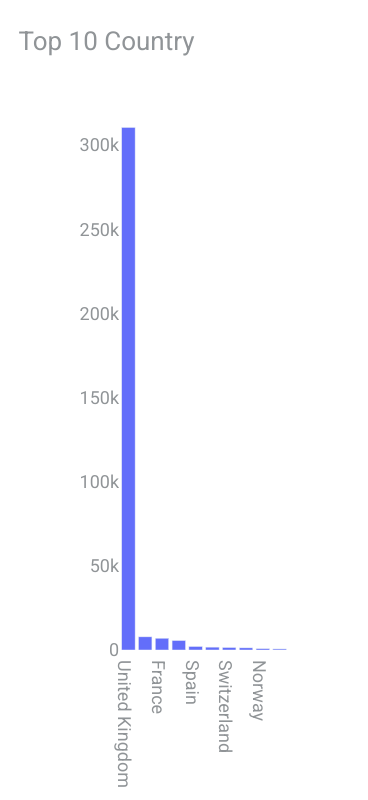

In [22]:
import plotly.graph_objects as go

y = df.Country.value_counts()[:10]
x = df.Country.value_counts().index[:10]
# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Country", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

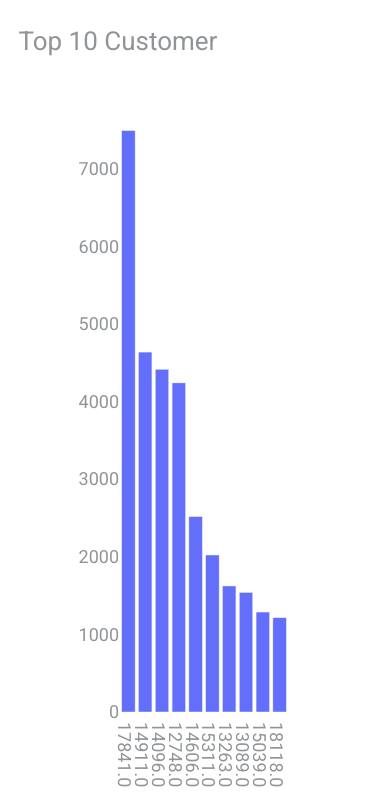

In [23]:
import plotly.graph_objects as go

y = df.CustomerID.value_counts().values[:10]
x = df.CustomerID.value_counts().index[:10].astype(str)
# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Customer", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              xaxis = dict(tickvals = df.CustomerID.value_counts().index[:10].astype(str)),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

In [24]:
# Based on the dataset, it is evident that customer ID 17841 has significantly higher trade activity.

In [25]:
### Feature Engineering 

In [26]:
df["Total Price"] = df.Quantity * df.UnitPrice 


In [27]:
df.CustomerID.value_counts()

CustomerID
17841.0    7492
14911.0    4638
14096.0    4416
12748.0    4241
14606.0    2517
           ... 
17763.0       1
16995.0       1
12603.0       1
15216.0       1
16078.0       1
Name: count, Length: 4222, dtype: int64

In [28]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Total Price           float64
dtype: object

<Axes: >

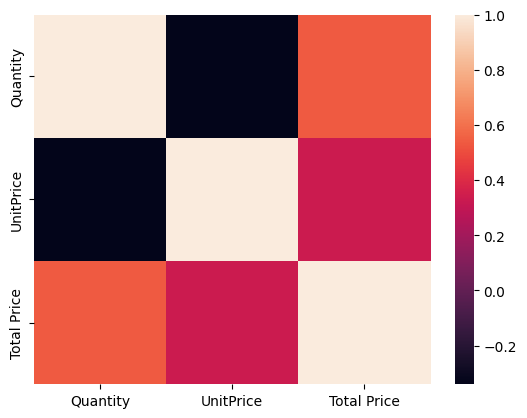

In [29]:
sns.heatmap(df.select_dtypes(["int64","float64"]).drop("CustomerID" , axis = 1).corr())

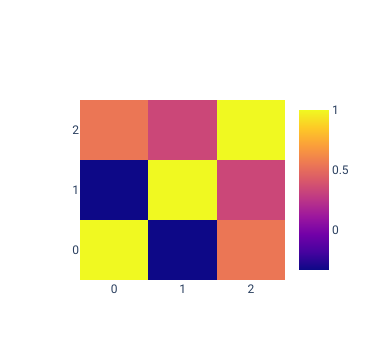

In [30]:
import plotly.graph_objects as go
z = df.select_dtypes(["int64","float64"]).drop("CustomerID", axis=1).corr()
fig = go.Figure(data=go.Heatmap(z= z ))
fig.show()

In [31]:
# as we see if the quantity increasing the unit price get low but the total price get increase 
# and the total price is increase by unit price too 

# and that cause total price = Quantity * unit price 

In [32]:
df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year
df["Month"] = pd.to_datetime(df.InvoiceDate).dt.month 
df["Day"] = pd.to_datetime(df.InvoiceDate).dt.day 
Data = pd.get_dummies(df.drop(["InvoiceNo" , "StockCode" , "Description" ,"InvoiceDate"] , axis = 1) , "Country")

In [33]:
Data.corr()

Quantity  UnitPrice  CustomerID  Total Price  \
Quantity                      1.000000  -0.340354   -0.136698     0.538147   
UnitPrice                    -0.340354   1.000000   -0.008018     0.330631   
CustomerID                   -0.136698  -0.008018    1.000000    -0.115453   
Total Price                   0.538147   0.330631   -0.115453     1.000000   
Year                          0.025666  -0.027984   -0.037593    -0.001423   
Month                        -0.040722  -0.004144    0.028733    -0.025388   
Day                           0.003978  -0.002807    0.000927    -0.003749   
Country_Australia             0.009822   0.015126   -0.067253     0.028933   
Country_Austria               0.015173   0.001682   -0.051804     0.016318   
Country_Bahrain               0.001040   0.003197   -0.009791     0.004294   
Country_Belgium               0.032400  -0.001459   -0.118717     0.020740   
Country_Brazil                0.007232   0.005969   -0.012698     0.014239   
Country_Canada                0.013698  -0.003627    0.022100     0.004761   
Country_Channel Islands       0.025192   0.003408   -0.009864     0.022263   
Country_Cyprus                0.000495   0.012741   -0.064537     0.007926   
Country_Czech Republic        0.012652  -0.000988   -0.011018     0.010364   
Country_Denmark               0.032413  -0.002478   -0.047833     0.028492   
Country_EIRE                  0.057701   0.020605   -0.040772     0.059351   
Country_European Community    0.004346   0.005153   -0.001460     0.006979   
Country_Finland               0.023441   0.001851   -0.063854     0.020187   
Country_France                0.071997  -0.012298   -0.222373     0.052993   
Country_Germany               0.073832  -0.006563   -0.237632     0.056679   
Country_Greece                0.009328   0.007028   -0.017203     0.019677   
Country_Iceland               0.013161   0.002095   -0.038142     0.012415   
Country_Israel                0.018437  -0.001582   -0.036809     0.011690   
Country_Italy                 0.015722   0.009640   -0.067614     0.019367   
Country_Japan                -0.002036  -0.001204   -0.030041     0.007873   
Country_Lebanon               0.003525   0.006810   -0.014618     0.012046   
Country_Lithuania             0.010066   0.005140    0.000066     0.021442   
Country_Malta                 0.001336   0.004059    0.016661     0.002221   
Country_Netherlands           0.026892   0.002041   -0.033495     0.040486   
Country_Norway                0.031865   0.009267   -0.080702     0.037499   
Country_Poland                0.013541   0.001754   -0.041905     0.012326   
Country_Portugal              0.019078  -0.003277   -0.091293     0.016311   
Country_RSA                  -0.000287   0.003122   -0.019406     0.003078   
Country_Saudi Arabia          0.000172   0.000730   -0.008673     0.000289   
Country_Singapore             0.018540   0.009654   -0.031519     0.030068   
Country_Spain                 0.018083   0.002551   -0.106589     0.011335   
Country_Sweden                0.021110  -0.000355   -0.033541     0.018799   
Country_Switzerland           0.047435  -0.002007   -0.101045     0.038554   
Country_USA                  -0.008940  -0.002650   -0.041571    -0.010999   
Country_United Arab Emirates  0.010106  -0.000487   -0.001601     0.009396   
Country_United Kingdom       -0.155025  -0.008209    0.425361    -0.138061   
Country_Unspecified           0.002061  -0.000037   -0.023419    -0.004143   

                                  Year     Month       Day  Country_Australia  \
Quantity                      0.025666 -0.040722  0.003978           0.009822   
UnitPrice                    -0.027984 -0.004144 -0.002807           0.015126   
CustomerID                   -0.037593  0.028733  0.000927          -0.067253   
Total Price                  -0.001423 -0.025388 -0.003749           0.028933   
Year                          1.000000 -0.337110  0.170319           0.003068   
Month                        -0.3

In [34]:
from sklearn.decomposition import PCA 

In [35]:
dim_red = PCA()

In [36]:
new_data = dim_red.fit_transform(Data)

In [37]:
new_data.shape

(344393, 44)

In [38]:
columns = dim_red.get_feature_names_out()

In [39]:
dim_red.explained_variance_ratio_.round(3)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
import seaborn as sns 

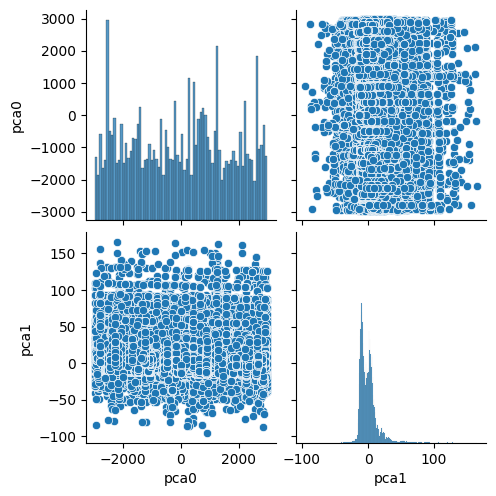

In [41]:
sns.pairplot(pd.DataFrame(new_data[: , :2] , columns = columns[:2]))

* for more information : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [43]:
km = KMeans(2)

In [44]:
km.fit(new_data)

KMeans(n_clusters=2)

In [45]:
predict = km.predict(new_data)

In [46]:
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [47]:
predict.max()

1

<Axes: >

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



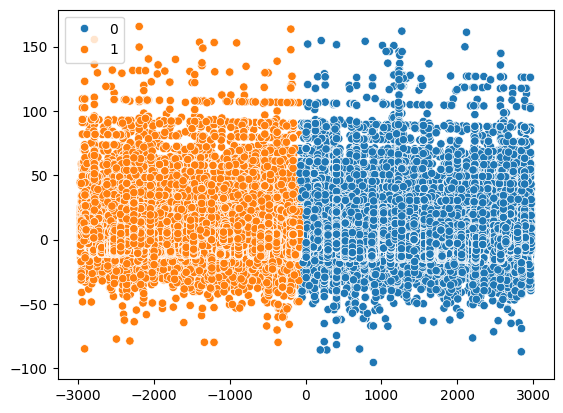

In [48]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

In [49]:
new_data[:,0].shape

(344393,)

In [50]:
predict.shape

(344393,)

In [51]:
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [52]:
km.inertia_

256005107883.7088

In [53]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(new_data)
    kmeanModel.fit(new_data)
 
    distortions.append(sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / new_data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / new_data.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [54]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 1477.8065449873777
2 : 751.5456933007075
3 : 498.08970748914527
4 : 362.21256740072687
5 : 289.4354145210123
6 : 237.1596638342562
7 : 209.70125339268077
8 : 184.30117612945935
9 : 160.33671926224892


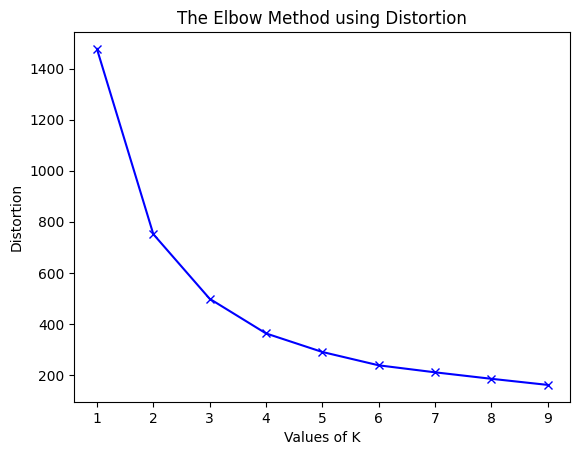

In [55]:
import matplotlib.pyplot as plt 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [56]:
for key, val in mapping2.items():
    print(f'{key} : {val}')


1 : 1008867059764.025
2 : 256005107883.7088
3 : 111937271852.31549
4 : 60344466915.05156
5 : 38320506962.76892
6 : 26042235860.00385
7 : 20373502095.857056
8 : 15603502659.595589
9 : 11969865711.506826


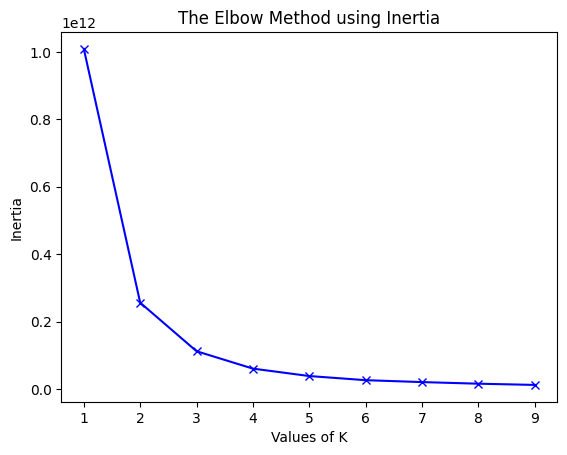

In [57]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [58]:
import matplotlib.pyplot as plt 

In [59]:
km = KMeans(5)
km.fit(new_data)
predict = km.predict(new_data)

<Axes: >

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/home/aboud/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



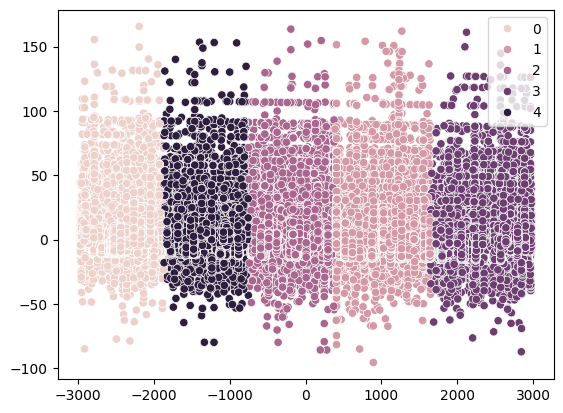

In [60]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

In [62]:
# ok we got a nice plot for pca with classes 

<Axes: xlabel='Quantity', ylabel='Total Price'>

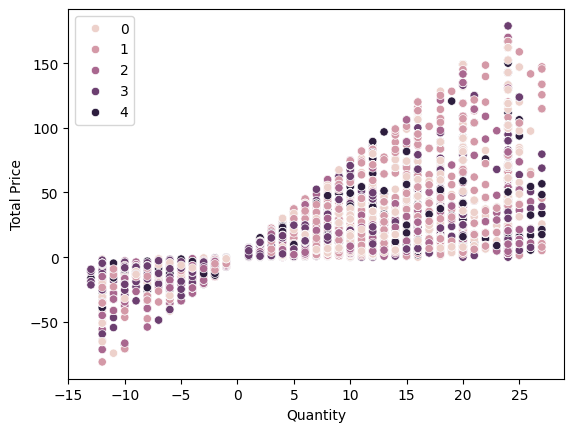

In [63]:
sns.scatterplot(x = df.Quantity , y = df["Total Price"] , hue= predict)

In [64]:
# df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year
# df["Month"] = pd.to_datetime(df.InvoiceDate).dt.month 
# # pd.to_datetime(df.InvoiceDate).dt.day 


In [65]:
df.Year.value_counts()

Year
2011    321790
2010     22603
Name: count, dtype: int64

In [66]:
df.shape 

(344393, 12)

In [67]:
Data["Class"] = predict 
df["Class"] = predict 

In [68]:
Data.corr()

Quantity  UnitPrice  CustomerID  Total Price  \
Quantity                      1.000000  -0.340354   -0.136698     0.538147   
UnitPrice                    -0.340354   1.000000   -0.008018     0.330631   
CustomerID                   -0.136698  -0.008018    1.000000    -0.115453   
Total Price                   0.538147   0.330631   -0.115453     1.000000   
Year                          0.025666  -0.027984   -0.037593    -0.001423   
Month                        -0.040722  -0.004144    0.028733    -0.025388   
Day                           0.003978  -0.002807    0.000927    -0.003749   
Country_Australia             0.009822   0.015126   -0.067253     0.028933   
Country_Austria               0.015173   0.001682   -0.051804     0.016318   
Country_Bahrain               0.001040   0.003197   -0.009791     0.004294   
Country_Belgium               0.032400  -0.001459   -0.118717     0.020740   
Country_Brazil                0.007232   0.005969   -0.012698     0.014239   
Country_Canada                0.013698  -0.003627    0.022100     0.004761   
Country_Channel Islands       0.025192   0.003408   -0.009864     0.022263   
Country_Cyprus                0.000495   0.012741   -0.064537     0.007926   
Country_Czech Republic        0.012652  -0.000988   -0.011018     0.010364   
Country_Denmark               0.032413  -0.002478   -0.047833     0.028492   
Country_EIRE                  0.057701   0.020605   -0.040772     0.059351   
Country_European Community    0.004346   0.005153   -0.001460     0.006979   
Country_Finland               0.023441   0.001851   -0.063854     0.020187   
Country_France                0.071997  -0.012298   -0.222373     0.052993   
Country_Germany               0.073832  -0.006563   -0.237632     0.056679   
Country_Greece                0.009328   0.007028   -0.017203     0.019677   
Country_Iceland               0.013161   0.002095   -0.038142     0.012415   
Country_Israel                0.018437  -0.001582   -0.036809     0.011690   
Country_Italy                 0.015722   0.009640   -0.067614     0.019367   
Country_Japan                -0.002036  -0.001204   -0.030041     0.007873   
Country_Lebanon               0.003525   0.006810   -0.014618     0.012046   
Country_Lithuania             0.010066   0.005140    0.000066     0.021442   
Country_Malta                 0.001336   0.004059    0.016661     0.002221   
Country_Netherlands           0.026892   0.002041   -0.033495     0.040486   
Country_Norway                0.031865   0.009267   -0.080702     0.037499   
Country_Poland                0.013541   0.001754   -0.041905     0.012326   
Country_Portugal              0.019078  -0.003277   -0.091293     0.016311   
Country_RSA                  -0.000287   0.003122   -0.019406     0.003078   
Country_Saudi Arabia          0.000172   0.000730   -0.008673     0.000289   
Country_Singapore             0.018540   0.009654   -0.031519     0.030068   
Country_Spain                 0.018083   0.002551   -0.106589     0.011335   
Country_Sweden                0.021110  -0.000355   -0.033541     0.018799   
Country_Switzerland           0.047435  -0.002007   -0.101045     0.038554   
Country_USA                  -0.008940  -0.002650   -0.041571    -0.010999   
Country_United Arab Emirates  0.010106  -0.000487   -0.001601     0.009396   
Country_United Kingdom       -0.155025  -0.008209    0.425361    -0.138061   
Country_Unspecified           0.002061  -0.000037   -0.023419    -0.004143   
Class                         0.074779  -0.008186   -0.319592     0.059368   

                                  Year     Month       Day  Country_Australia  \
Quantity                      0.025666 -0.040722  0.003978           0.009822   
UnitPrice                    -0.027984 -0.004144 -0.002807           0.015126   
CustomerID                   -0.037593  0.028733  0.000927          -0.067253   
Total Price                  -0.001423 -0.025388 -0.003749           0.028933   
Year                          1.0000

In [69]:
# data = np.append(new_data, predict.reshape(-1,1), 1)

<Axes: xlabel='Class'>

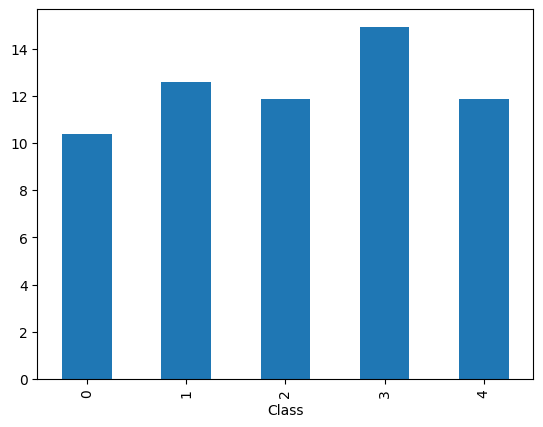

In [70]:
df.groupby("Class")["Total Price"].mean().plot(kind = "bar")

In [71]:
df.groupby("Class")

In [72]:
df 

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
344388    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
344389    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
344390    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
344391    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
344392    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
344388 2011-12-09 12:50:00       0.85     12680.0          France   
344389 2011-12-09 12:50:00       2.10     12680.0          France   
344390 2011-12-09 12:50:00       4.15     12680.0          France   
344391 2011-12-09 12:50:00       4.15     12680.0          France   
344392 2011-12-09 12:50:00       4.95     12680.0          France   

        Total Price  Year  Month  Day  Class  
0             15.30  2010     12    1      0  
1             20.34  2010     12    1      0  
2             22.00  2010     12    1      0  
3             20.34  2010     12    1      0  
4             20.34  2010     12    1      0  
...             ...   ...    ...  ...    ...  
344388        10.20  2011     12    9      3  
344389        12.60  2011     12    9      3  
344390        16.60  2011     12    9      3  
344391        16.60  2011     12    9      3  
344392        14.85  2011     12    9      3  

[344393 rows x 13 columns]

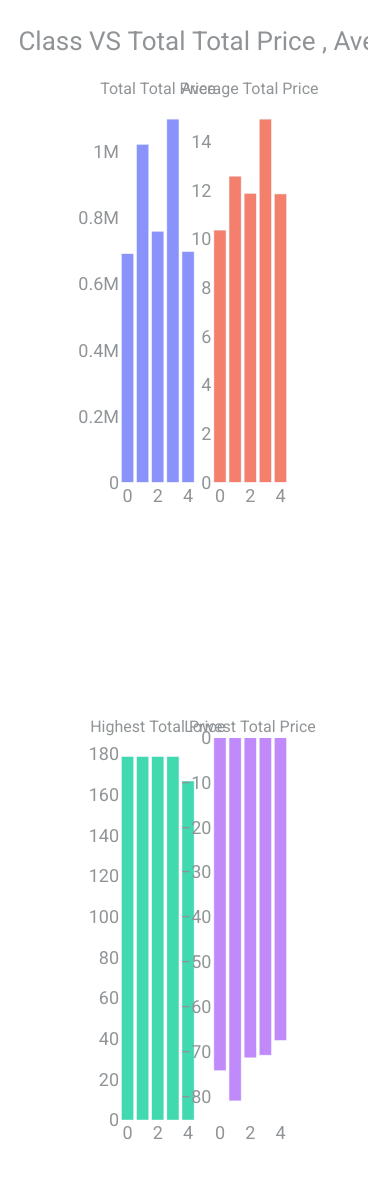

In [73]:
from tools import column_summary_statistics 
from tools import plot_column_summary_statistics 
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Total Price"))


In [ ]:
there is a negative values in min price 
that is not natural to have price in negative 


In [77]:
df[df.Quantity < 0]

InvoiceNo StockCode                       Description  Quantity  \
131      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS      -1.0   
174      C536391     22556    PLASTERS IN TIN CIRCUS PARADE      -12.0   
175      C536391     21484       CHICK GREY HOT WATER BOTTLE     -12.0   
176      C536391     22557  PLASTERS IN TIN VINTAGE PAISLEY      -12.0   
804      C536506     22960          JAM MAKING SET WITH JARS      -6.0   
...          ...       ...                               ...       ...   
343789   C581470     23084                RABBIT NIGHT LIGHT      -4.0   
343997   C581490     22178   VICTORIAN GLASS HANGING T-LIGHT     -12.0   
343998   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL     -11.0   
344228   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER      -1.0   
344229   C581569     20979     36 PENCILS TUBE RED RETROSPOT      -5.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
131    2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
174    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
175    2010-12-01 10:24:00       3.45     17548.0  United Kingdom   
176    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
804    2010-12-01 12:38:00       4.25     17897.0  United Kingdom   
...                    ...        ...         ...             ...   
343789 2011-12-08 19:28:00       2.08     17924.0  United Kingdom   
343997 2011-12-09 09:57:00       1.95     14397.0  United Kingdom   
343998 2011-12-09 09:57:00       0.83     14397.0  United Kingdom   
344228 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   
344229 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   

        Total Price  Year  Month  Day  Class  
131           -4.65  2010     12    1      2  
174          -19.80  2010     12    1      0  
175          -41.40  2010     12    1      0  
176          -19.80  2010     12    1      0  
804          -25.50  2010     12    1      0  
...             ...   ...    ...  ...    ...  
343789        -8.32  2011     12    8      0  
343997       -23.40  2011     12    9      1  
343998        -9.13  2011     12    9      1  
344228        -1.25  2011     12    9      0  
344229        -6.25  2011     12    9      0  

[6211 rows x 13 columns]

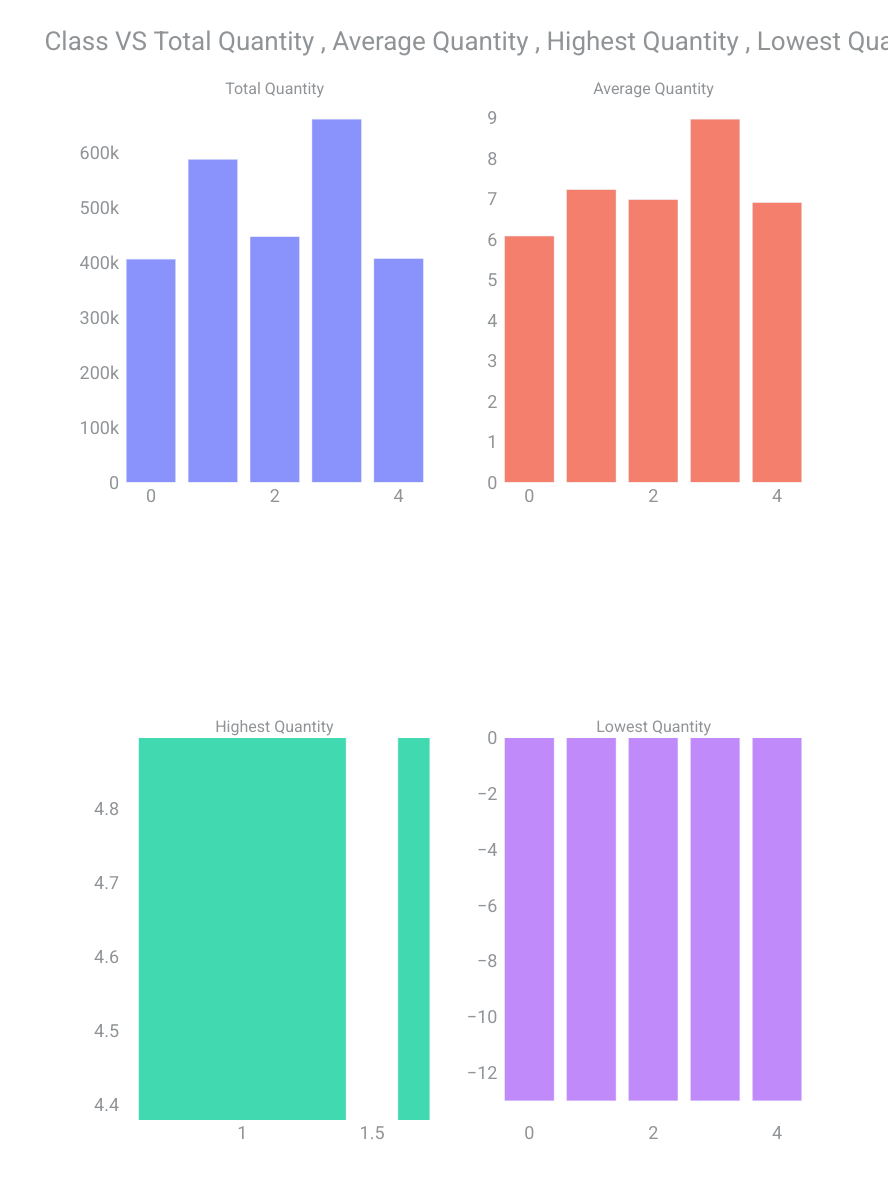

In [74]:
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Quantity"))


In [ ]:
there is a negative values in min Quantity
that is not natural to have Quantity in negative 

Quick search: 
What is negative quantity in stock?
A negative quantity indicates a sell transaction whereas a positive quantity indicates a buy transaction.
The shares you sold will be settled on T+2 day & the funds will be available for withdrawal then.
However, 80% of the value of shares sold can be utilized to make additional trades.

In [ ]:
So right now we will apply absolute on price 
and we will Create another columns called 
transaction type that indicates whether sell or buy transactions 

In [79]:
df["Total Price"] = df["Total Price"].apply(lambda x : np.abs(x))

In [80]:
df["Transaction Type"] = ["Buy" if i > 0 else "Sell" for i in df.Quantity ]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
344388    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
344389    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
344390    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
344391    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
344392    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
344388 2011-12-09 12:50:00       0.85     12680.0          France   
344389 2011-12-09 12:50:00       2.10     12680.0          France   
344390 2011-12-09 12:50:00       4.15     12680.0          France   
344391 2011-12-09 12:50:00       4.15     12680.0          France   
344392 2011-12-09 12:50:00       4.95     12680.0          France   

        Total Price  Year  Month  Day  Class Transaction Type  
0             15.30  2010     12    1      0              Buy  
1             20.34  2010     12    1      0              Buy  
2             22.00  2010     12    1      0              Buy  
3             20.34  2010     12    1      0              Buy  
4             20.34  2010     12    1      0              Buy  
...             ...   ...    ...  ...    ...              ...  
344388        10.20  2011     12    9      3              Buy  
344389        12.60  2011     12    9      3              Buy  
344390        16.60  2011     12    9      3              Buy  
344391        16.60  2011     12    9      3              Buy  
344392        14.85  2011     12    9      3              Buy  

[344393 rows x 14 columns]